In [11]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [12]:
data = pd.read_csv('./data_first_solar_FSLR.csv')
data['date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)

In [13]:
data

,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
date,,,,,
2011-01-03,8,0.000000,0.203625,0.278763,132.78
2011-01-04,3,0.176000,0.132667,0.087533,131.12
2011-01-05,9,0.000000,0.109556,0.220822,131.60
2011-01-06,16,0.091500,0.093313,0.020131,134.53
2011-01-07,26,0.006231,0.016885,0.014558,133.58
...,...,...,...,...,...
2021-03-26,80,0.038038,0.141800,0.218311,85.69
2021-03-29,38,0.041579,0.135316,0.187032,81.61
2021-03-30,79,0.021595,0.124456,0.185378,86.53


# Import Data Normalized

In [16]:
data_normalized =  pd.read_csv('./data_first_solar_FSLR_normalized.csv')

In [17]:
data_normalized

,Date,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
0,2011-01-03,0.008274,0.000000,0.607965,0.674062,0.760926
1,2011-01-04,0.002364,0.712551,0.396104,0.458135,0.750487
2,2011-01-05,0.009456,0.000000,0.327101,0.608638,0.753506
3,2011-01-06,0.017730,0.370445,0.278604,0.382027,0.771930
4,2011-01-07,0.029551,0.025226,0.050413,0.375734,0.765956
...,...,...,...,...,...,...
2535,2021-03-26,0.093381,0.153998,0.423374,0.605803,0.464818
2536,2021-03-29,0.043735,0.168336,0.404014,0.570483,0.439162
2537,2021-03-30,0.092199,0.087429,0.371589,0.568617,0.470100
2538,2021-03-31,0.073286,0.069019,0.350323,0.587444,0.474942


# Lag Analysis

In [24]:
max_lag = 1000

In [19]:
def plot_cross_correlation(series_1, series_2, max_lag):
    fig, ax1 = plt.subplots(figsize = (18,5))
    ax1.xcorr(series_1, series_2, usevlines = True, maxlags = max_lag, normed=True)
    ax1.set_ylim(0,1)
    ax1.grid(True)
    plt.show()

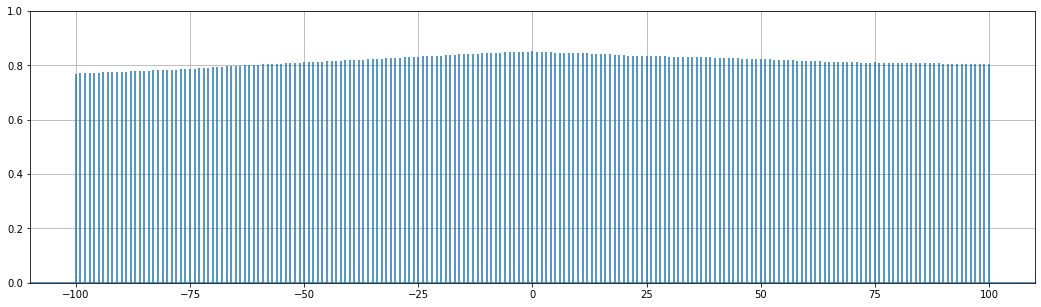

In [20]:
series_1 = data['pos_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

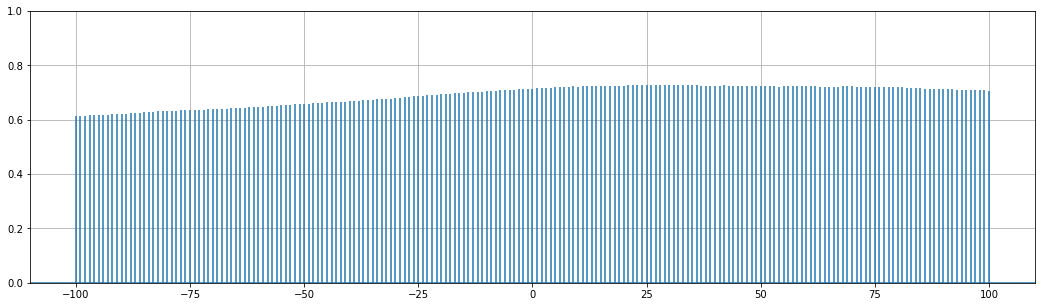

In [21]:
series_1 = data['neg_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

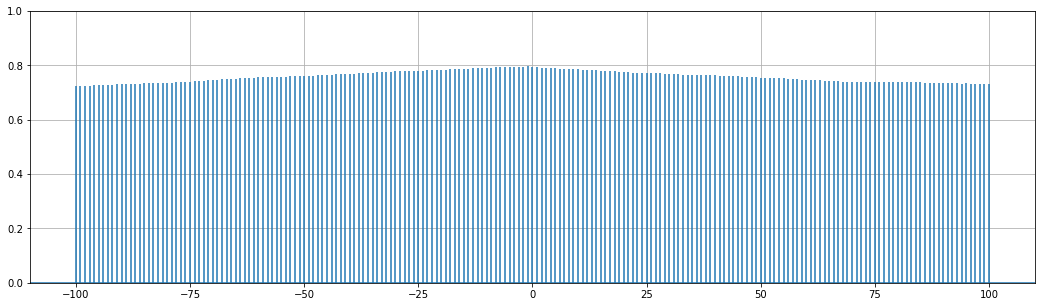

In [22]:
series_1 = data['compound_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

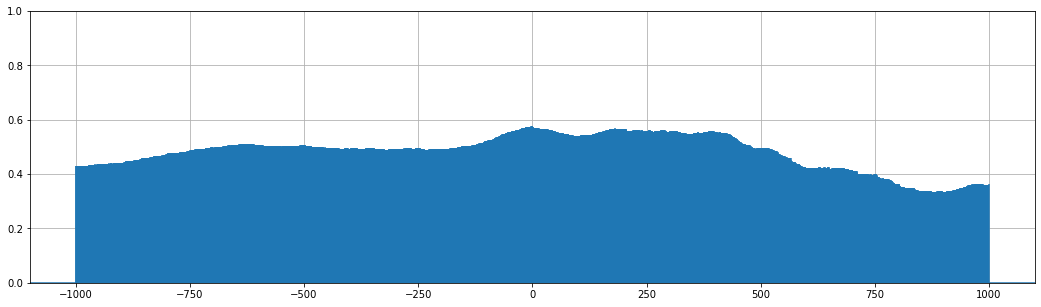

In [25]:
series_1 = data['daily_tweets'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

# Granger Causality 

In [ ]:
data.columns

In [ ]:
input_data = np.asarray(data[['compound_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst=True, verbose=True)

In [ ]:
input_data = np.asarray(data[['pos_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)

In [ ]:
input_data = np.asarray(data[['daily_tweets', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)